In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

In [99]:
IMU_pca = pd.read_csv("./outputs/IMU_pca_05.csv")

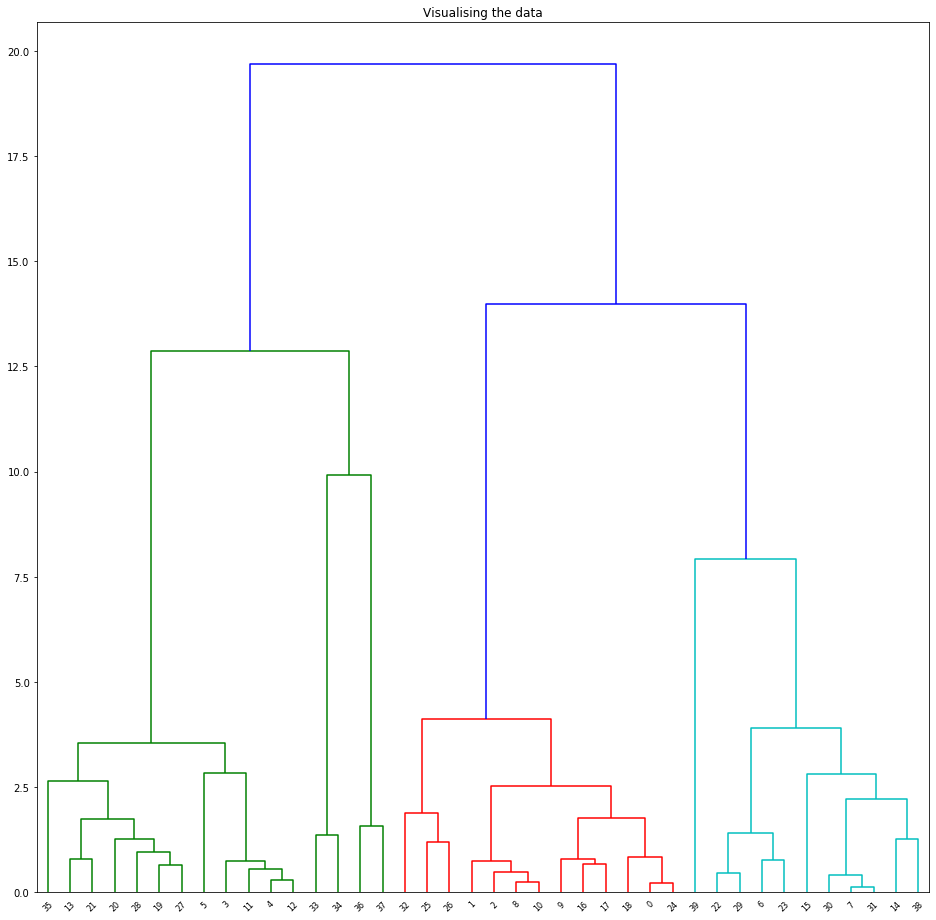

In [100]:
plt.figure(figsize =(16, 16)) 

plt.title('Visualising the data') 

Dendrogram = shc.dendrogram((shc.linkage(IMU_pca, method ='ward'))) 

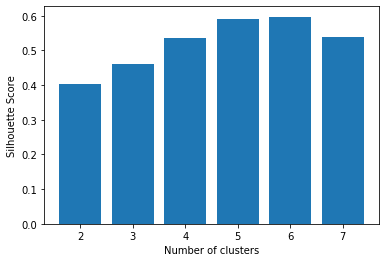

In [101]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(IMU_pca, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(IMU_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [102]:
agg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
agg.fit(IMU_pca)

AgglomerativeClustering(n_clusters=3)

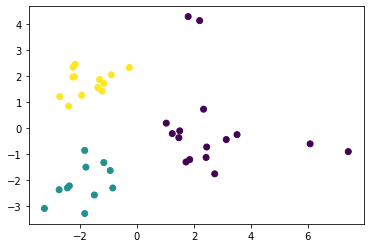

In [103]:
# Visualizing the clustering 
plt.scatter(IMU_pca["0"], IMU_pca["1"],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(IMU_pca)) 
plt.show() 

In [104]:
preds = agg.fit_predict(IMU_pca)

In [105]:
IMU_pca['preds'] = preds

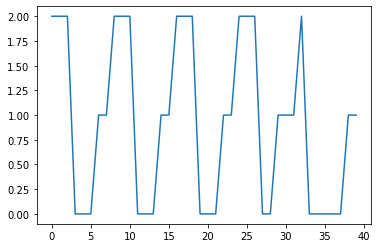

In [106]:
plt.plot(IMU_pca.index, IMU_pca['preds'].tolist())

In [88]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(IMU_pca)

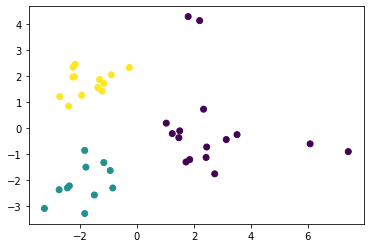

In [91]:
# Visualizing the clustering 
plt.scatter(IMU_pca["0"], IMU_pca["1"],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(IMU_pca)) 
plt.show() 

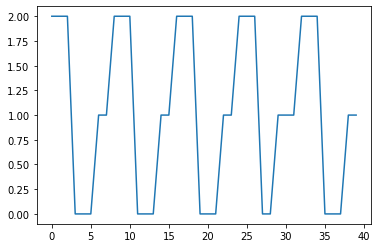

In [93]:
plt.plot(kmeans.labels_)